# Data Cleaning and Exploration

## 1.) Problem Definition

> 
* Given historical maintenance and repair transactions of car owners, can we predict the car component that is most likely to fail?
* Can we predict how many days is the useful life of the component before failure (optional)



## 2.) Data

## 3.) Features

**Create Data Dictionary**

1. Created	
2. Mileage In
3. Mileage Out	
4. Work Order 
5. Year: ***model year** is a method of describing the version of a product which has been produced over multiple years. A vehicle's model year is not necessarily the same as the year it was manufactured.*
6. Make: *the **brand** of the vehicle*
7. Model: *refers to the name of a car product and sometimes a range of products*
8. Submodel: *refers to the specific body type style options of a vehicle *
   * *For example, the 2018 Honda Civic Sedan have six different trim-level options:
     * LX*
     * ET
     * EX-T
     * EX-L
     * Si
     * Touring
9. Engine: *a number or code refering to the identification marked on the engine of a vehicle.*
10. VIN (Vehicle Identification Number): *is the identifying code for a specific automobile. The VIN serves as the car's fingerprint, as no two vehicles in operation have the same VIN.* 
   * We can visit the Vin Decoders [[1](https://vpic.nhtsa.dot.gov/decoder/)], [[2](https://driving-tests.org/vin-decoder/)]
11. Line Type: general category for the services.
   * Material
   * Labor
   * Sublet (*What is a sublet?*)
12. Service Category
   * Oil, Lube & Preventive Maintenance Service
   * Sublet & Towing
   * Engine
   * Electrical (Belts, Lighting, Starting & Charging Systems)
   * Tires & Wheels
   * Driveability (Fuel, Ignition & Emission Systems)
   * Steering & Suspension 
   * Brakes
   * Cooling System
   * Transmission & Clutch
   * Car Detailing Services
   * Accessories (Gauges, Power Accessories, Vision & Air Bag)
   * Counter / Cash Sale
   * HVAC (Heating, Ventilation & Air Conditioning)
   * Drive Train (Final Drive, Transaxle, Differential & Transfer Case
   * Batteries
   * Exhaust
   * Shop Internal Warranty
13. Code: (*Is this a unique identifier code in their system?*)
14. Service Package: *Type of service package offered. How was this data gathered? Manually inputted? Or system defined?* (*There are 4251 unique values that they want to predict. How should we proceed?*)
15. Line Code
    * E.ROD
    * BAN
    * MIT 
    * FIC
    * FLE
    * BEN
    * SAI
    * 555
    * AISIN
16. Part Number: *Refers to the specific part serviced*(*There are 5396 unique values for Part Number. How should we proceed?*)
17. Description: **For Clarification** : *Does this column indicate the name of material/product used?*
18. Manufacturer: *Refers to the manufacturer of the product used during the service.*
19. Definition: **For Clarification:** *We have 24780 null values here, can we use the description instead? But this is also a good column since it generalizes the type of product used.*
20. Price
21. Quantity
22. Total
23. Discount
24. Net Total
25. Cost
26. Other Charge Code
27. ContactID
28. ServiceItemID
29. InvoiceID
30. DefinitionID




## Import Core Libraries


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns',50)

In [14]:
df_original = pd.read_csv(r"C:\Users\justine.padayao\Documents\GitHub\capstone-autoserved\Dataset\FINAL3.csv", low_memory= False)
df_original.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
0,1,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
1,2,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
2,3,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
3,4,12/28/2018 10:18,33320,49,civic,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
4,5,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012


In [15]:
# There are 5416 unique transactions
df_original['Work Order'].nunique()

4561

In [16]:
df_original['InvoiceID'].nunique()

5940

## General Data

In [17]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37548 entries, 0 to 37547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Primary Key       37548 non-null  int64  
 1   Created           37548 non-null  object 
 2   Mileage In        37548 non-null  int64  
 3   Work Order        37548 non-null  int64  
 4   Model             37548 non-null  object 
 5   Line Type         37548 non-null  object 
 6   Service Category  37548 non-null  object 
 7   Service Package   37525 non-null  object 
 8   Description       37548 non-null  object 
 9   Definition        15582 non-null  object 
 10  Price             37548 non-null  float64
 11  Quantity          37548 non-null  float64
 12  Total             37548 non-null  float64
 13  Discount          37548 non-null  float64
 14  Net Total         37548 non-null  float64
 15  ContactID         37548 non-null  object 
 16  ServiceItemID     37548 non-null  object

## Cleaned Dataset

In [18]:
df = pd.read_csv(r"C:\Users\justine.padayao\Documents\GitHub\capstone-autoserved\Dataset\FINAL3.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37548 entries, 0 to 37547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Primary Key       37548 non-null  int64  
 1   Created           37548 non-null  object 
 2   Mileage In        37548 non-null  int64  
 3   Work Order        37548 non-null  int64  
 4   Model             37548 non-null  object 
 5   Line Type         37548 non-null  object 
 6   Service Category  37548 non-null  object 
 7   Service Package   37525 non-null  object 
 8   Description       37548 non-null  object 
 9   Definition        15582 non-null  object 
 10  Price             37548 non-null  float64
 11  Quantity          37548 non-null  float64
 12  Total             37548 non-null  float64
 13  Discount          37548 non-null  float64
 14  Net Total         37548 non-null  float64
 15  ContactID         37548 non-null  object 
 16  ServiceItemID     37548 non-null  object

In [20]:
# We use errors = `coerce` to force an out-of-bounds date to NaT
df['Created'] = pd.to_datetime(df['Created'],errors = 'coerce')

In [21]:
# Let us drop the NaT values for the column created
df = df.dropna()

In [22]:
# The new values for our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15577 entries, 0 to 37547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Primary Key       15577 non-null  int64         
 1   Created           15577 non-null  datetime64[ns]
 2   Mileage In        15577 non-null  int64         
 3   Work Order        15577 non-null  int64         
 4   Model             15577 non-null  object        
 5   Line Type         15577 non-null  object        
 6   Service Category  15577 non-null  object        
 7   Service Package   15577 non-null  object        
 8   Description       15577 non-null  object        
 9   Definition        15577 non-null  object        
 10  Price             15577 non-null  float64       
 11  Quantity          15577 non-null  float64       
 12  Total             15577 non-null  float64       
 13  Discount          15577 non-null  float64       
 14  Net Total         1557

In [23]:
df.describe(include =[object])

,Model,Line Type,Service Category,Service Package,Description,Definition,ContactID,ServiceItemID,InvoiceID,labels,Make
count,15577,15577,15577,15577,15577,15577,15577,15577,15577,15577,15577
unique,206,1,15,2875,3614,526,2210,2604,4332,67,23
top,vios,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service,ENGINE FLUSHING,Engine Oil,b0389171-37fd-4817-ae24-d383378b5c25,f6fef4bf-2f1d-4fc5-88a3-0101465186a7,1187fb69-4d33-4434-bcba-a3a9789db83f,preventive maintenance,toyota
freq,2348,15577,10147,532,1010,2786,472,54,24,7242,5572


### What are the Car Brands most frequently appearing in the maintenance and repair?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(0, 1, 'mitsubishi'),
  Text(0, 2, 'honda'),
  Text(0, 3, 'ford'),
  Text(0, 4, 'hyundai'),
  Text(0, 5, 'chevrolet'),
  Text(0, 6, 'mazda'),
  Text(0, 7, 'nissan'),
  Text(0, 8, 'suzuki'),
  Text(0, 9, 'isuzu')])

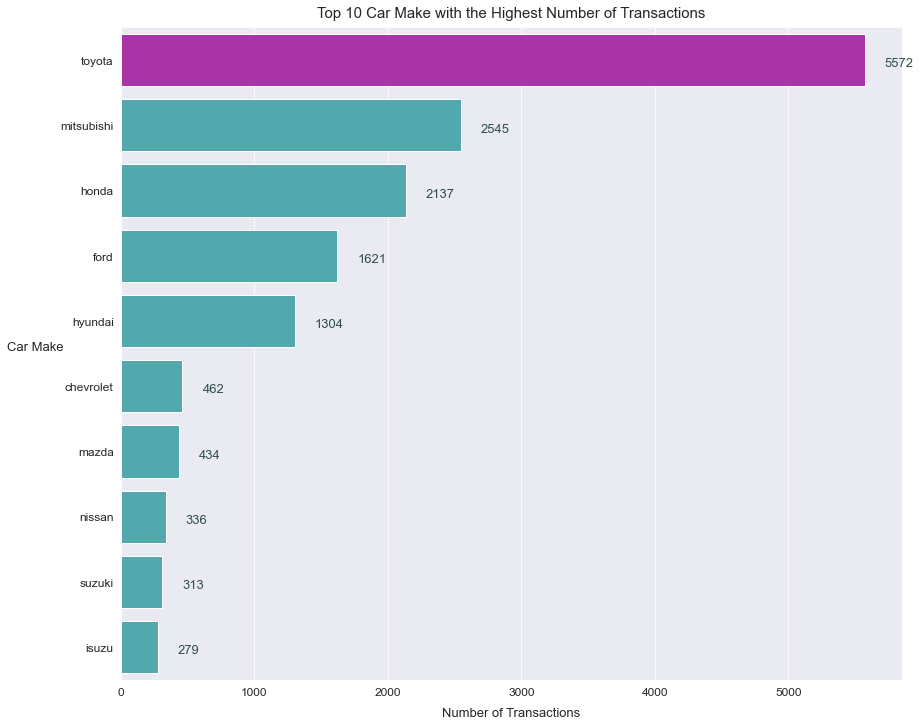

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,12))
ax = sns.countplot(data = df, y = 'Make', order =df['Make'].value_counts().iloc[:10].index, color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list 

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+150, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=13, color='darkslategray')

# Setting the labels and titles
plt.title('Top 10 Car Make with the Highest Number of Transactions', fontsize = 15, pad = 10)
plt.xlabel('Number of Transactions', fontsize = 13, labelpad = 10)
plt.ylabel('Car Make', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [25]:
df_top_10_transactions = df[df['Make'].isin(['toyota','mitsubishi','honda','ford','hyundai','chevrolet','nissan','mazda','isuzu','suzuki'])]
df_top_10_transactions

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
0,1,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
4,5,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
9,10,2018-12-28 14:38:00,68598,63,city,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (COMPACT/...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,0b038ac1-2e24-4a7b-bcba-c0d14d7e3ab0,632fd79a-58ff-4f67-a5d8-154f98b316a4,7601ba6c-004b-481b-ac32-ec815edc9b0d,preventive maintenance,honda,2012
13,17,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Rear Crankshaft Oil Seal,Engine Crankshaft Seal Kit,1119.40,1.0,1119.40,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2010
17,21,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,GEARMASTER SAE 90,Automatic Transmission Fluid,186.57,3.0,559.71,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37540,43011,2021-03-17 08:35:00,104214,2308,montero,Material,Brakes,Disc Brake Pads (Front),BRAKE PADS(FR)-MITS MONTERO 2016 ORIGINAL,Disc Brake Pad,6250.00,1.0,6250.00,0.0,6250.00,1766b3a3-4c50-41ee-915e-cf474c3a0b1a,c1c3bc1d-46ca-4df0-a8cc-652e1d9563b8,440d2a50-7c40-4d68-add6-6968b2050d92,Brakes,mitsubishi,2015
37544,43017,2021-02-19 13:17:00,145542,2141,rav4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,COMPRESSOR OIL WITH AIRCON,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004
37545,43018,2021-02-19 13:17:00,145542,2141,rav4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,O-Ring LARGE,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004
37546,43019,2021-02-19 13:17:00,145542,2141,rav4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,O-RING MEDIUM,A/C O-Ring,26.79,2.0,53.58,0.0,53.58,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004


### On average, how much does a car owner spend on maintenance and repair?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ford'),
  Text(0, 1, 'chevrolet'),
  Text(0, 2, 'nissan'),
  Text(0, 3, 'hyundai'),
  Text(0, 4, 'toyota'),
  Text(0, 5, 'mazda'),
  Text(0, 6, 'isuzu'),
  Text(0, 7, 'mitsubishi'),
  Text(0, 8, 'honda'),
  Text(0, 9, 'suzuki')])

<Figure size 1008x864 with 0 Axes>

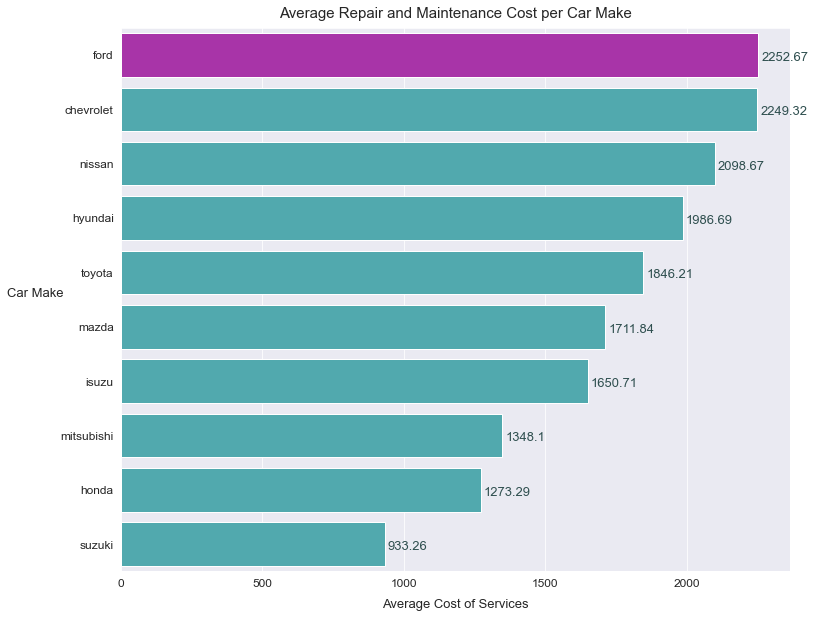

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,12))

plt.figure(figsize = (12,10))
df_average_spend = df_top_10_transactions.groupby(['Make'])[['Net Total']].mean().sort_values(by ='Net Total', ascending = False).reset_index()
ax = sns.barplot(data = df_average_spend, y = 'Make', x = 'Net Total', color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=13, color='darkslategray')

# Setting the labels and titles
plt.title('Average Repair and Maintenance Cost per Car Make', fontsize = 15, pad = 10)
plt.xlabel('Average Cost of Services', fontsize = 13, labelpad = 10)
plt.ylabel('Car Make', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### What are the usual transactions of every car owner?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Oil, Lube & Preventive Maintenance Service'),
  Text(0, 1, 'Steering & Suspension'),
  Text(0, 2, 'Brakes'),
  Text(0, 3, 'Engine'),
  Text(0, 4, 'Transmission & Clutch'),
  Text(0, 5, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(0, 6, 'Cooling System'),
  Text(0, 7, 'Tires & Wheels'),
  Text(0, 8, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(0, 9, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(0, 10, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(0, 11, 'Batteries'),
  Text(0, 12, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(0, 13, 'Counter / Cash Sale'),
  Text(0, 14, 'Sublet & Towing')])

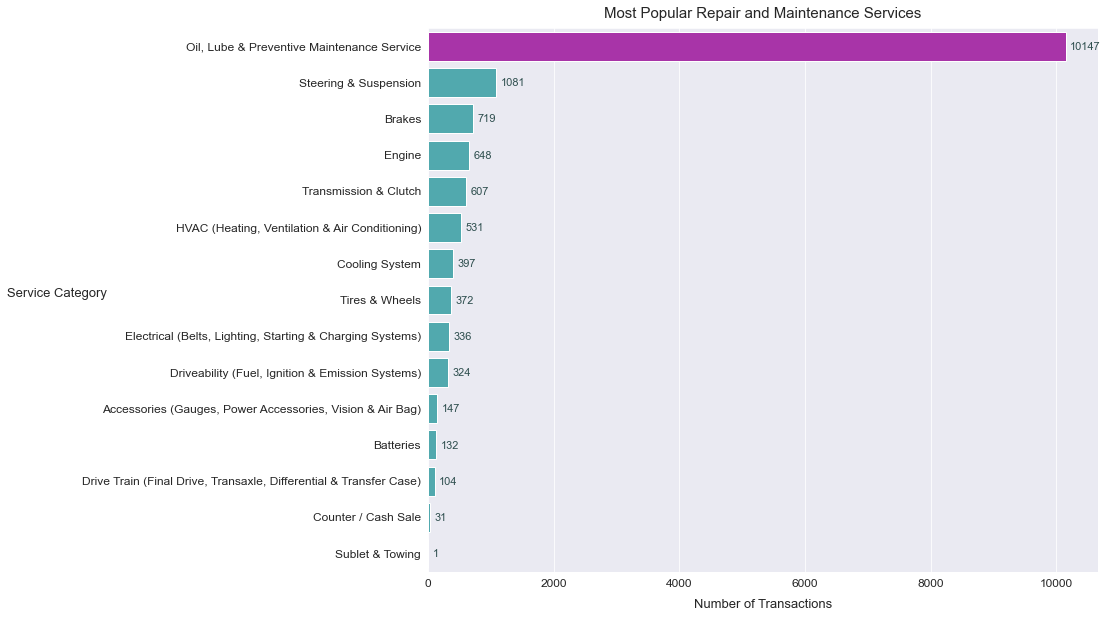

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
ax = sns.countplot(data = df, y = 'Service Category', order =df['Service Category'].value_counts().iloc[::].index, color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+70, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=11, color='darkslategray')

# Setting the labels and titles
plt.title('Most Popular Repair and Maintenance Services', fontsize = 15, pad = 10)
plt.xlabel('Number of Transactions', fontsize = 13, labelpad = 10)
plt.ylabel('Service Category', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### What are the distribution of services for the Top 10 Car Make

In [42]:
df_top_10_transactions.groupby(['Make','Service Category']).size().reset_index().to_csv('Service Category Stacked.csv')

### What is the distribution of mileage?

<AxesSubplot:ylabel='Mileage In'>

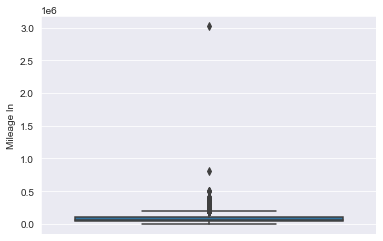

In [29]:
sns.boxplot(data = df, y = 'Mileage In')

In [30]:
df['Mileage In'].nsmallest(20)

558      0
567      0
2893     0
8133     0
19392    0
19395    0
19396    0
19397    0
19399    0
19663    0
19665    0
19666    0
916      1
1452     1
2447     1
2448     1
2449     1
13308    1
13310    1
14478    1
Name: Mileage In, dtype: int64

In [31]:
df.loc[df['Mileage In'] < 1000,'Mileage In'].value_counts()

1      97
0      12
10      9
660     8
153     6
4       1
5       1
Name: Mileage In, dtype: int64

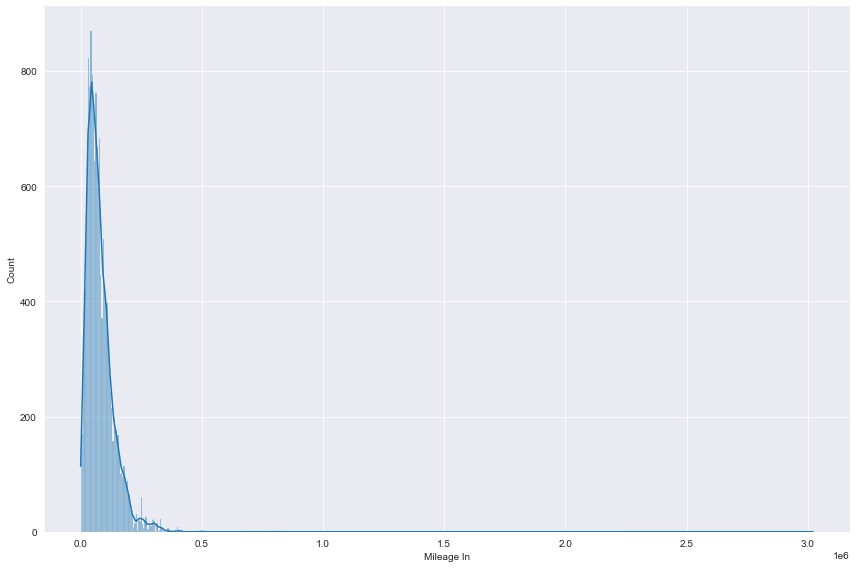

In [32]:
sns.displot(data = df[np.isfinite(df['Mileage In'])], x = 'Mileage In', kde = True, height = 8, aspect = 1.5)

## Feature Engineering

In [33]:
# Create time component columns to further investigate

df['Year'] = df['Created'].dt.year # Year column
# Month column
df['Month'] = df['Created'].dt.month 
df['Hour'] = df['Created'].dt.hour # Hour column

# Day column
df['Day'] = df['Created'].dt.dayofweek

In [34]:
df.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year,Month,Hour,Day
0,1,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2018,12,10,4
4,5,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2018,12,10,4
9,10,2018-12-28 14:38:00,68598,63,city,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (COMPACT/...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,0b038ac1-2e24-4a7b-bcba-c0d14d7e3ab0,632fd79a-58ff-4f67-a5d8-154f98b316a4,7601ba6c-004b-481b-ac32-ec815edc9b0d,preventive maintenance,honda,2018,12,14,4
13,17,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Rear Crankshaft Oil Seal,Engine Crankshaft Seal Kit,1119.40,1.0,1119.40,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2018,12,10,2
17,21,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,GEARMASTER SAE 90,Automatic Transmission Fluid,186.57,3.0,559.71,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2018,12,10,2


In [35]:
df_trial = df.copy()
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_trial['Day'] = df_trial['Day'].apply(lambda x: days[x])
df_trial.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year,Month,Hour,Day
0,1,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2018,12,10,Friday
4,5,2018-12-28 10:18:00,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2018,12,10,Friday
9,10,2018-12-28 14:38:00,68598,63,city,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (COMPACT/...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,0b038ac1-2e24-4a7b-bcba-c0d14d7e3ab0,632fd79a-58ff-4f67-a5d8-154f98b316a4,7601ba6c-004b-481b-ac32-ec815edc9b0d,preventive maintenance,honda,2018,12,14,Friday
13,17,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Rear Crankshaft Oil Seal,Engine Crankshaft Seal Kit,1119.40,1.0,1119.40,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2018,12,10,Wednesday
17,21,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,GEARMASTER SAE 90,Automatic Transmission Fluid,186.57,3.0,559.71,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,hyundai,2018,12,10,Wednesday


In [36]:
df_trial.loc[(df_trial['Day'] == 'Saturday'),:]

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year,Month,Hour,Day
104,109,2019-01-05 08:42:00,56789,134,suzuki,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service : Concern...,REPSOL ELITE COMMON RAIL SAE 5W30 1L,Engine Oil,607.14,4.0,2428.56,0.0,2428.56,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,preventive maintenance,suzuki,2019,1,8,Saturday
111,116,2019-01-05 09:02:00,109894,136,toyota,Material,"Oil, Lube & Preventive Maintenance Service",Change Oil - Fully Synthetic (DIESEL - LANDCRU...,OIL FILTER ELEMENT - LAND CRUISER,Engine Oil Filter,1116.07,1.0,1116.07,0.0,1116.07,0708052a-d278-4b7b-90f1-4cf86df489ba,e92b154b-69eb-4d1d-bbf7-1c33350ca357,b8c04359-a3ec-4d71-a850-0f2b9e986a04,"change oil, lube and flushing",toyota,2019,1,9,Saturday
112,117,2019-01-05 09:02:00,109894,136,toyota,Material,"Oil, Lube & Preventive Maintenance Service",Change Oil - Fully Synthetic (DIESEL - LANDCRU...,REPSOL ELITE COMMON RAIL SAE 5W30 1L - DIESEL,Engine Oil,607.14,8.0,4857.12,0.0,4857.12,0708052a-d278-4b7b-90f1-4cf86df489ba,e92b154b-69eb-4d1d-bbf7-1c33350ca357,b8c04359-a3ec-4d71-a850-0f2b9e986a04,"change oil, lube and flushing",toyota,2019,1,9,Saturday
113,118,2019-01-05 09:02:00,109894,136,toyota,Material,"Oil, Lube & Preventive Maintenance Service",Change Oil - Fully Synthetic (DIESEL - LANDCRU...,ENGINE FLUSHING,Engine Flush,142.86,1.0,142.86,0.0,142.86,0708052a-d278-4b7b-90f1-4cf86df489ba,e92b154b-69eb-4d1d-bbf7-1c33350ca357,b8c04359-a3ec-4d71-a850-0f2b9e986a04,"change oil, lube and flushing",toyota,2019,1,9,Saturday
118,123,2019-01-05 09:33:00,43117,137,rav4,Material,"Oil, Lube & Preventive Maintenance Service",MAJOR Preventive Maintenance Service / COMPLET...,REPSOL ELITE COMMON RAIL SAE 5W30 1L G/D,Engine Oil,607.14,5.0,3035.70,0.0,3035.70,474197f1-cd3c-47ae-a598-624de6d34abd,b2b4a671-ce0c-4d4b-9685-f0bc2aff7733,1747b68f-b069-4f80-ba42-1af6d9e2e143,complete vehicle inspection,toyota,2019,1,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37410,42857,2021-02-20 12:03:00,42815,2150,montero,Material,Brakes,Disc Brake Caliper(s) - Front,CALIPER KIT FRONT - MITSUBISHI MONTERO ORIG,Disc Brake Caliper,1187.51,2.0,2375.02,0.0,2375.02,9ee7761f-025c-4253-85c2-d573b614fc29,fec1e72d-de90-48b7-abb8-cbd778fabb38,c6e1bd8a-d7f8-4521-b1ee-8511ff5852ac,Brakes,mitsubishi,2021,2,12,Saturday
37425,42874,2021-03-06 10:08:00,200740,2245,vios,Material,Steering & Suspension,REMOVE AND REPLACE SHOCK MOUNTING,SHOCK MOUNTING TYT-VIOS,Shock Absorber,1674.10,2.0,3348.20,0.0,3348.20,a0def57c-2d23-4362-90d3-30b6c3698ab6,2c8ec1db-9b32-4ddc-9831-957dbf1d93ba,0e94c27e-fe8e-406f-9264-42b6fe898636,suspension,toyota,2021,3,10,Saturday
37428,42877,2021-03-06 10:08:00,200740,2245,vios,Material,"Oil, Lube & Preventive Maintenance Service",Change Oil Package - REGULAR (4L),REPSOL ELITE SUPER 20W50 1L,Engine Oil,241.07,4.0,964.28,0.0,964.28,a0def57c-2d23-4362-90d3-30b6c3698ab6,2c8ec1db-9b32-4ddc-9831-957dbf1d93ba,0e94c27e-fe8e-406f-9264-42b6fe898636,"change oil, lube and flushing",toyota,2021,3,10,Saturday
37431,42883,2021-02-13 11:01:00,162245,2093,adventure,Material,Brakes,Disc Brake Caliper(s) - Front,"FRONT CALIPER KIT (LH,RH)-ADVENTURE",Disc Brake Caliper,1500.01,2.0,3000.02,0.0,3000.02,17094436-e5ac-4657-a758-ea8e51635126,42c89a4f-c13d-49f8-a17a-cb04555e1e38,cdbc9e9f-2ad2-4fc9-8ff6-14102bd152c4,Brakes,mitsubishi,2021,2,11,Saturday


In [37]:
# df_day_mean = df.groupby(['Day']).mean().reset_index(name = 'Counts').sort_values(by = 'Day')

In [38]:
df_day.describe(include = [object])

NameError: name 'df_day' is not defined

In [ ]:
df_day = df.groupby(['Day']).size().reset_index(name = 'Counts').sort_values(by = 'Day')
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_day['Day'] = df_day['Day'].apply(lambda x: days[x])
df_day

In [ ]:
## Daily Pattern

plt.figure(figsize = (12,10))
ax = sns.lineplot(data = df_day, x = 'Day' , y = 'Counts', color = 'darkslategray', marker ='o')
plt.title('Car Repair and Maintenance Daily Pattern', fontsize = 15, pad = 10)
plt.xlabel('Day', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 13, labelpad = 25)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [ ]:
## Hourly Pattern

# Setting the data to hours
df_hour = df.groupby(['Hour']).size().reset_index(name = 'Counts')

#Setting the general information
plt.figure(figsize = (10,8))
ax = sns.lineplot(data = df_hour, x = 'Hour' , y = 'Counts',color = 'darkslategray',marker ='o')
plt.title('Car Repair and Maintenance Hourly Pattern', fontsize = 15, pad = 10)
plt.xlabel('Hour', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 13, labelpad = 25)
plt.xticks(np.arange(0,24,2),fontsize = 12)
plt.yticks(fontsize = 12)

In [ ]:
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_month = df.groupby(['Month']).size().reset_index(name = 'Counts')
df_month['Month'] = df_month['Month'].apply(lambda x: months[x])
df_month

In [ ]:
## Monthly Pattern

plt.figure(figsize = (12,10))
ax = sns.lineplot(data = df_month, x = 'Month' , y = 'Counts', color = 'darkslategray',marker = 'o')

#Setting the the labels on the plot
for x, y in zip(df_month['Month'], df_month['Counts']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y+50, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'navy') # set colour of line

#Setting the general information
plt.title('Car Repair and Maintenance Monthly Pattern', fontsize = 15, pad = 10)
plt.xlabel('Month', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 15, labelpad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### Label Clustering: We will use the original dataframe to include all possible categories

In [ ]:
df_original['Service Category'].unique()

### Tires & Wheels

In [ ]:
# Tires and Wheels

df_tw = df_original.loc[(df_original['Service Category'] == 'Tires & Wheels'),:]

In [ ]:
# # Code for Reproduceability

# def tires_wheels_clustering(dataset):
#   df_tw = dataset.loc[(dataset['Service Category'] == 'Tires & Wheels'),:]

#   # Replace Mount to Mount, Install, & Balance
#   df_tw.loc[df_tw['Service Package'].str.contains('Mount', case = False),'Service Package'] = 'Mount, Install, & Balance'
#   df_tw.loc[df_tw['Service Package'].str.contains('Balance'),'Service Package'] = 'Mount, Install, & Balance'
#   df_tw.loc[df_tw['Service Package'].str.contains('Balancing', case = False),'Service Package'] = 'Mount, Install, & Balance'

#   # Map Tire Replacement to all values that contain replacement
#   df_tw.loc[df_tw['Service Package'].str.contains('Replace'),'Service Package'] = 'Tire Replacement'
#   df_tw.loc[df_tw['Service Package'].str.contains('REPLACEMENT', case = False),'Service Package'] = 'Tire Replacement'

#   # Tire Vulcanizing
#   df_tw.loc[df_tw['Service Package'].str.contains('Vulcan'),'Service Package'] = 'Tire Vulcanizing'

#   # Tire Rotation
#   df_tw.loc[df_tw['Service Package'].str.contains('Rotat'),'Service Package'] = 'Tire Rotation'

#   # Other General Services
#   df_tw.loc[~df_tw['Service Package'].isin(['Mount, Install, & Balance','Tire Rotation','Tire Vulcanizing','Tire Replacement']),'Service Package'] = 'Other General Services'

# tires_wheels_clustering

In [ ]:
df_tw['Service Package'].value_counts()

### Accessories

In [ ]:
## This is for accessories
df_acc = df_original.loc[(df_original['Service Category'] == 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),:]

In [ ]:
# df_acc.loc[df_acc['Service Package'].str.contains('wiper', case = False),'Service Package'] = 'Windshield Wiper Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('wind', case = False),'Service Package'] = 'Windshield Wiper Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('door', case = False),'Service Package'] = 'Door Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('window', case = False),'Service Package'] = 'Power Window Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('power accessories', case = False),'Service Package'] = 'Power Accessories General Service'
# df_acc.loc[df_acc['Service Package'].str.contains('general', case = False),'Service Package'] = 'Accessories General Service'
# df_acc.loc[df_acc['Service Package'].str.contains('horn', case = False),'Service Package'] = 'Car Horn Repair & Services'
# df_acc.loc[df_acc['Service Package'].str.contains('seat', case = False),'Service Package'] = 'Car Seat Services'
# df_acc.loc[df_acc['Service Package'].str.contains('Hood', case = False),'Service Package'] = 'Car Hood Services'
# df_acc.loc[~df_acc['Service Package'].isin(['Windshield Wiper Servicing','Door Servicing','Power Window Servicing','Power Accessories General Service'
#                                            ,'Accessories General Service','Car Horn Repair & Services',
#                                            'Car Seat Services','Car Hood Services']),'Service Package'] = 'Other Accessories Services'


In [ ]:
df_acc.loc[~df_acc['Service Package'].isin(['Windshield Wiper Servicing','Door Servicing','Power Window Servicing','Power Accessories General Service'
                                           ,'Accessories General Service','Car Horn Repair & Services',
                                           'Car Seat Services','Car Hood Services']),'Service Package'] = 'Other Accessories Services'

In [ ]:
df_acc.loc[df_acc['Service Package'].str.contains('hood', case = False),'Service Package'].value_counts()

In [ ]:
df_acc['Service Package'].value_counts()

### Counter / Cash Sale

In [ ]:
df_ccs = df_original.loc[(df_original['Service Category'] == 'Counter / Cash Sale'),:]

In [ ]:
# df_ccs.loc[df_ccs['Service Package'].str.contains('Counter', case = False),'Service Package'] = 'Counter / Cash Sale'
# df_ccs.loc[df_ccs['Service Package'].str.contains('Tools', case = False),'Service Package'] = 'Tools and Equipment'
# df_ccs.loc[~df_ccs['Service Package'].isin(['Counter / Cash Sale','Tools and Equipment']),'Service Package'] = 'Other Requests'

In [ ]:
df_ccs.loc[~df_ccs['Service Package'].isin(['Counter / Cash Sale','Tools and Equipment']),'Service Package'] = 'Other Requests'

In [ ]:
df_ccs['Service Package'].value_counts()

### HVAC

In [ ]:
## This is for HVAC
df_hvac = df_original.loc[(df_original['Service Category'] == 'HVAC (Heating, Ventilation & Air Conditioning)'),:]

In [ ]:
## General Services

# df_hvac.loc[df_hvac['Service Package'].str.contains('general', case = False),'Service Package'] = 'Air Conditioner General Cleaning Service'
# df_hvac.loc[df_hvac['Service Package'].str.contains('vacuum', case = False),'Service Package'] = 'Vacuum/Charging Service'
# df_hvac.loc[df_hvac['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Air Conditioner General Repair Service'

## Specific Services

# df_hvac.loc[df_hvac['Service Package'].str.contains('filter', case = False),'Service Package'] = 'Cabin Air Filter'
# df_hvac.loc[df_hvac['Service Package'].str.contains('compressor', case = False),'Service Package'] = 'Air Conditioning Compressor'
# df_hvac.loc[df_hvac['Service Package'].str.contains('evaporator', case = False),'Service Package'] = 'Air Conditioner Evaporator'
# df_hvac.loc[df_hvac['Service Package'].str.contains('blower', case = False),'Service Package'] = 'Blower Motor Assembly'
# df_hvac.loc[df_hvac['Service Package'].str.contains('fan', case = False),'Service Package'] = 'Air Conditioner Fan Motor'

## Other Services

# df_hvac.loc[~df_hvac['Service Package'].isin(['Air Conditioner General Cleaning Service','Vacuum/Charging Service','Air Conditioning Compressor'
#                                              ,'Cabin Air Filter','Air Conditioner General Repair Service',
#                                              'Air Conditioner Evaporator','Blower Motor Assembly','Air Conditioner Fan Motor']
#                                             ),'Service Package'] = 'Other Air Conditioning Concerns'

In [ ]:
df_hvac['Service Package'].value_counts()

### Drive Train

In [ ]:
## This is for drive train
df_dt = df_original.loc[(df_original['Service Category'] == 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),:]

In [ ]:
# # Clustering of Drive Shaft

# df_dt.loc[df_dt['Service Package'].str.contains('Drive Shaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('DriveShaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('Oil Seal', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('oilseal', case = False),'Service Package'] = 'Servicing of Drive Shaft'

# # Clustering of Differential Fluid Exchange

# df_dt.loc[df_dt['Service Package'].str.contains('fluid', case = False),'Service Package'] = 'Differential Fluid Exchange'

# # Clustering of Axle Shaft
# df_dt.loc[df_dt['Service Package'].str.contains('Axle', case = False),'Service Package'] = 'Servicing of Axle Shaft'

# # Other Drive Train Services
# df_dt.loc[~df_dt['Service Package'].isin(['Servicing of Drive Shaft','Servicing of Axle Shaft','Differential Fluid Exchange']),'Service Package'] = 'Other General Drive Train Services'

In [ ]:
df_dt['Service Package'].value_counts()

### Batteries

In [ ]:
## This is for drive train
df_batt = df_original.loc[(df_original['Service Category'] == 'Batteries'),:]

In [ ]:
# Clustering of Battery Replacement
df_batt.loc[df_batt['Service Package'].str.contains('replace', case = False),'Service Package'] = 'Battery Replacement'
df_batt.loc[df_batt['Service Package'].str.contains('change', case = False),'Service Package'] = 'Battery Replacement'

# Clustering of General Battery Services
df_batt.loc[df_batt['Service Package'].str.contains('jump', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('charge', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('start', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('test', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('general', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('service', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'

# Clustering of Other Services as recommended by the Preventive Maintenance Schedule
df_batt.loc[~df_batt['Service Package'].isin(['Battery Replacement','Battery General Services (Charge, Test, Start)']),'Service Package'] = 'Other Services (PMS Recommendaton)'

In [ ]:
df_batt['Service Package'].value_counts()

### Sublet & Towing

In [ ]:
## This is for drive train
df_sublet = df_original.loc[(df_original['Service Category'] == 'Sublet & Towing'),:]

In [ ]:
df_sublet.loc[df_sublet['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Body Repair and Paint Works'
df_sublet.loc[df_sublet['Service Package'].str.contains('towing', case = False),'Service Package'] = 'Towing'
df_sublet.loc[~df_sublet['Service Package'].isin(['Body Repair and Paint Works','Towing']),'Service Package'] = 'Other Sublet Services (Machine Shop)'

In [ ]:
df_sublet['Service Package'].value_counts()

### Break Function

In [ ]:
df_break = df_original.loc[(df_original['Service Category'] == 'Brakes'),:]

In [ ]:
df_break.loc[df_break['Service Package'].str.contains('pad', case = False),'Service Package'] = 'Disc Brake Pad'
df_break.loc[df_break['Service Package'].str.contains('general', case = False),'Service Package'] = 'Brake System General Service'
df_break.loc[df_break['Service Package'].str.contains('disc brake rotors', case = False),'Service Package'] = 'Disc Brake Rotors'
df_break.loc[df_break['Service Package'].str.contains('disc brake caliper', case = False),'Service Package'] = 'Disc Brake Caliper'
df_break.loc[df_break['Service Package'].str.contains('disc brake hardware kit', case = False),'Service Package'] = 'Disc Brake Hardware'
df_break.loc[df_break['Service Package'].str.contains('disc brake service', case = False),'Service Package'] = 'Disc Brake Hardware'
df_break.loc[df_break['Service Package'].str.contains('brake wheel', case = False),'Service Package'] = 'Drum Brake Wheel'
df_break.loc[df_break['Service Package'].str.contains('caliper', case = False),'Service Package'] = 'Disc Brake Caliper'
df_break.loc[df_break['Service Package'].str.contains('bearing', case = False),'Service Package'] = 'Wheel Bearing'
df_break.loc[df_break['Service Package'].str.contains('fluid', case = False),'Service Package'] = 'Brake Fluid Service (Exchange, System Flush, Bleeding)'
df_break.loc[df_break['Service Package'].str.contains('clean', case = False),'Service Package'] = 'Brake Cleaning Service'
df_break.loc[df_break['Service Package'].str.contains('shoes', case = False),'Service Package'] = 'Drum Brake Shoes'
df_break.loc[df_break['Service Package'].str.contains('cylinder', case = False),'Service Package'] = 'Brake Master Cylinder'
df_break.loc[df_break['Service Package'].str.contains('light', case = False),'Service Package'] = 'Brake Light System'
df_break.loc[df_break['Service Package'].str.contains('recommend', case = False),'Service Package'] = 'Preventive Maintenance System Recommendation'
df_break.loc[df_break['Service Package'].str.contains('bleed', case = False),'Service Package'] = 'Brake Fluid Service (Exchange, System Flush, Bleeding)'
df_break.loc[df_break['Service Package'].str.contains('brake system', case = False),'Service Package'] = 'Brake System General Service'
df_break.loc[df_break['Service Package'].str.contains('sensor', case = False),'Service Package'] = 'ABS Wheel Speed Sensor'
df_break.loc[~df_break['Service Package'].isin(['Disc Brake Pad','Brake System General Service','Disc Brake Rotors',
                                                 'Disc Brake Caliper','Drum Brake Wheel',
                                                 'Wheel Bearing','Brake Fluid Service (Exchange, System Flush, Bleeding)',
                                                 'Brake Cleaning Service','Drum Brake Shoes','Brake Master Cylinder',
                                                 'Brake Light System','Preventive Maintenance System Recommendation',
                                                 ]),'Service Package'] = 'Other Brake Services'

In [ ]:
df_break.loc[df_break['Service Package'].str.contains('cylinder', case = False),'Service Package'] = 'Brake System General Service'

In [ ]:
df_break.loc[df_break['Service Package'].str.contains('sensor', case = False),'Service Package'].value_counts()

In [ ]:
df_break['Service Package'].value_counts().head(50)

## Cleaning the year value

In [ ]:
df_original['Year'].value_counts()

In [ ]:
df_year_zero = df_original.loc[df_original['Year'] == 0,:]

In [ ]:
# Drop the null values for VIN
df_year_zero.dropna(subset = ['VIN'], inplace = True)

In [ ]:
df_year_zero.head()

In [ ]:
# KMFZBX7BAEU009739 is 2013 Hyundai H100
df_year_zero.loc[df_year_zero['VIN'] == 'KMFZBX7BAEU009739','Year'] = 2013

# MR053HY4109007212 is 2005 Toyota Suluna Vios
df_year_zero.loc[df_year_zero['VIN'] == 'MR053HY4109007212','Year'] = 2005

# MMBGRKG40BF020071 is 2011 Mitsubishi Vativa/ Paj Sport
df_year_zero.loc[df_year_zero['VIN'] == 'MMBGRKG40BF020071','Year'] = 2011

# MRHCP26209P020051 is 2009 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'MRHCP26209P020051','Year'] = 2009

# JF1SHSLS59G019887 is 2009 Subaru
df_year_zero.loc[df_year_zero['VIN'] == 'JF1SHSLS59G019887','Year'] = 2009

# MMMA69B1EH7054733 is 1987
df_year_zero.loc[df_year_zero['VIN'] == 'MMMA69B1EH7054733','Year'] = 1987

# JMYLYV98WDJ000492 is 2013 Pajero
df_year_zero.loc[df_year_zero['VIN'] == 'JMYLYV98WDJ000492','Year'] = 2013

# JTMZD31V405085757 is 2008 Toyota Rav 4
df_year_zero.loc[df_year_zero['VIN'] == 'JMYLYV98WDJ000492','Year'] = 2008

#PAEL65MYEDB010311 is 2013 Mitsubishi
df_year_zero.loc[df_year_zero['VIN'] == 'PAEL65MYEDB010311','Year'] = 2013

#KMHBT51DP8U838103 is 2008 Hyundai Getz
df_year_zero.loc[df_year_zero['VIN'] == 'KMHBT51DP8U838103','Year'] = 2008

#PADGM663OEV002809 is 2014 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'PADGM663OEV002809','Year'] = 2014

# MR0ES12G003041038 is 2012 Hilux
df_year_zero.loc[df_year_zero['VIN'] == 'MR0ES12G003041038','Year'] = 2012

# MPBSXXMXKSEB87874 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSEB87874','Year'] = 1995

# MPAUCR85H81100056 - 2008 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'MPAUCR85H81100056','Year'] = 2008

# MPBSXXMXKSGR39030 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSGR39030','Year'] = 1995

# MMBXTA03AGH007599 - 2016 Mitsubishi Mirage
df_year_zero.loc[df_year_zero['VIN'] == 'MMBXTA03AGH007599','Year'] = 2016

# MMBJNKA40AD000947 - 2000 Mitsubishi 
df_year_zero.loc[df_year_zero['VIN'] == 'MMBJNKA40AD000947','Year'] = 2000

# PAEL35MYFFB024336 - 2015 Mitsubishi
df_year_zero.loc[df_year_zero['VIN'] == 'PAEL35MYFFB024336','Year'] = 2015

# MHKA4D4E3F05002474 - 2015 Daihatsu
df_year_zero.loc[df_year_zero['VIN'] == 'MHKA4D4E3F05002474','Year'] = 2015

# PADGM26509V002527 - 2009 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'PADGM26509V002527','Year'] = 2009

# MHFMICF3F8K002745 - 2008 Toyota Avanze
df_year_zero.loc[df_year_zero['VIN'] == 'MHFMICF3F8K002745','Year'] = 2008

# MR0RER32G506012818 - 2005 Toyota
df_year_zero.loc[df_year_zero['VIN'] == 'MR0RER32G506012818','Year'] = 2005

# KL1SF6971AH200854 - 2010 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'KL1SF6971AH200854','Year'] = 2010


# MNCUMFF50FW452634 - 2015 Ford Ranger
df_year_zero.loc[df_year_zero['VIN'] == 'MNCUMFF50FW452634','Year'] = 2015

# MMM156MH0DHB63080 - 2013 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'MMM156MH0DHB63080','Year'] = 2013

# MPBSXXMXKSES62788 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSES62788','Year'] = 1995




In [ ]:
df_year_zero.loc[df_year_zero['VIN'] == 'MRHCP26209P020051','Year'] = 2005

In [ ]:
df_year_zero['VIN'].value_counts().head(50)

## Cleaning the Mileage Value

In [ ]:
df['Mileage In'].value_counts().to_frame().head(20)

# Should I drop the values with 0,1,10? 

In [ ]:
df[df['Mileage In'].between(100,1000)]